<a href="https://colab.research.google.com/github/nakata077/Credit-Card-Fraud-Detection/blob/main/Credit_Card_Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_path = "/content/sample_data/creditcard.csv"

df = pd.read_csv(df_path)

df.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [16]:
#find Null
df.isnull().sum().sort_values(ascending = False)

V15       1
V16       1
Amount    1
V28       1
V27       1
V26       1
V25       1
V24       1
V23       1
V22       1
V21       1
V20       1
V19       1
V18       1
V17       1
Class     1
V14       1
V13       1
V12       1
V11       1
V10       1
V9        1
V8        1
V7        1
V6        1
V5        1
V1        0
V4        0
V3        0
V2        0
Time      0
dtype: int64

In [22]:
colums = df.columns

In [27]:
for col in colums:
  df[col] = df[col].fillna(df[col].dropna().mode().values[0] )

In [28]:
#find Null
df.isnull().sum().sort_values(ascending = False)

Time      0
V16       0
Amount    0
V28       0
V27       0
V26       0
V25       0
V24       0
V23       0
V22       0
V21       0
V20       0
V19       0
V18       0
V17       0
V15       0
V1        0
V14       0
V13       0
V12       0
V11       0
V10       0
V9        0
V8        0
V7        0
V6        0
V5        0
V4        0
V3        0
V2        0
Class     0
dtype: int64

<Axes: xlabel='Class', ylabel='count'>

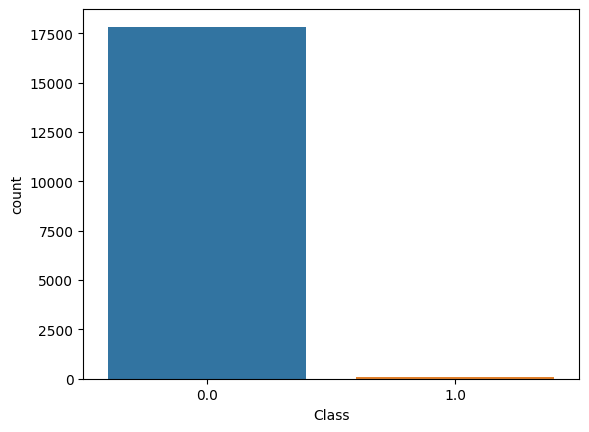

In [7]:
sns.countplot(x=df["Class"])

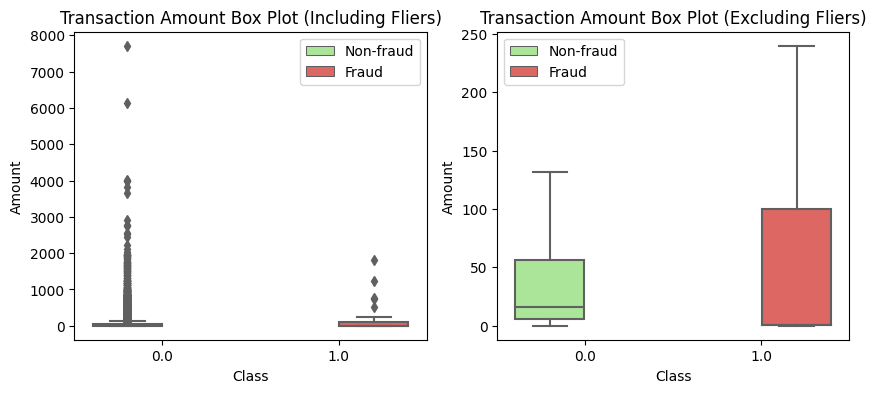

In [8]:
fig, ax = plt.subplots(ncols=2, figsize=(10,4))
sns.boxplot(data=df, 
            x="Class", 
            y="Amount", 
            hue="Class",
            palette=['#A4F28C' , "#F0544F"],
            showfliers=True,
            ax=ax[0])

sns.boxplot(data=df, 
            x="Class", 
            y="Amount", 
            hue="Class",
            palette=['#A4F28C', "#F0544F"],
            showfliers=False,
            ax=ax[1])

ax[0].set_title("Transaction Amount Box Plot (Including Fliers)")
ax[1].set_title("Transaction Amount Box Plot (Excluding Fliers)")

# Update legend labels
legend_labels = ['Non-fraud', 'Fraud']
for i in range(2):
    handles, _ = ax[i].get_legend_handles_labels()
    ax[i].legend(handles, legend_labels)

plt.show()

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17918 entries, 0 to 17917
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    17918 non-null  int64  
 1   V1      17918 non-null  float64
 2   V2      17918 non-null  float64
 3   V3      17918 non-null  float64
 4   V4      17918 non-null  float64
 5   V5      17917 non-null  float64
 6   V6      17917 non-null  float64
 7   V7      17917 non-null  float64
 8   V8      17917 non-null  float64
 9   V9      17917 non-null  float64
 10  V10     17917 non-null  float64
 11  V11     17917 non-null  float64
 12  V12     17917 non-null  float64
 13  V13     17917 non-null  float64
 14  V14     17917 non-null  float64
 15  V15     17917 non-null  float64
 16  V16     17917 non-null  float64
 17  V17     17917 non-null  float64
 18  V18     17917 non-null  float64
 19  V19     17917 non-null  float64
 20  V20     17917 non-null  float64
 21  V21     17917 non-null  float64
 22

In [10]:
#creat correlation matrix
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

<ipython-input-10-449fc44dd44a>:3: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  corr.style.background_gradient(cmap='coolwarm').set_precision(2)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.00,0.00,-0.02,-0.08,0.04,-0.08,-0.04,-0.07,0.06,-0.05,-0.01,0.02,-0.01,-0.02,-0.03,0.03,0.03,-0.00,-0.01,-0.02,0.01,0.00,0.02,-0.01,-0.01,0.06,-0.03,0.00,0.03,0.03,0.02
V1,0.00,1.00,-0.30,0.39,-0.13,0.16,0.14,0.33,-0.17,0.03,0.06,-0.10,0.12,0.03,0.26,0.06,0.24,0.24,0.08,-0.01,-0.15,-0.13,0.04,-0.06,-0.00,0.14,0.01,-0.16,0.03,-0.18,-0.32
V2,-0.02,-0.30,1.00,-0.40,0.16,-0.28,-0.04,-0.13,0.11,-0.12,-0.06,0.14,-0.15,0.03,-0.21,0.06,-0.15,-0.19,-0.05,-0.01,-0.01,0.09,-0.15,-0.03,-0.02,-0.08,-0.07,0.16,-0.04,-0.45,0.29
V3,-0.08,0.39,-0.40,1.00,-0.21,0.38,0.06,0.53,-0.38,0.23,0.31,-0.24,0.23,-0.00,0.36,-0.14,0.18,0.35,0.14,-0.06,-0.14,-0.05,0.24,0.04,0.03,-0.19,0.05,-0.22,-0.03,-0.11,-0.53
V4,0.04,-0.13,0.16,-0.21,1.00,-0.15,-0.06,-0.21,0.13,-0.18,-0.09,0.11,-0.18,0.07,-0.16,-0.15,-0.22,-0.05,-0.08,-0.02,0.01,0.00,-0.02,0.00,-0.04,-0.03,0.06,0.06,0.01,0.12,0.28
V5,-0.08,0.16,-0.28,0.38,-0.15,1.00,0.18,0.26,-0.23,0.05,0.24,-0.14,0.12,0.03,0.15,0.10,0.23,0.19,0.18,-0.02,-0.05,-0.08,-0.06,0.02,0.01,-0.09,-0.05,-0.11,-0.10,-0.29,-0.30
V6,-0.04,0.14,-0.04,0.06,-0.06,0.18,1.00,0.10,-0.08,0.05,0.11,-0.13,0.01,0.03,0.12,-0.11,0.06,0.09,0.07,0.10,-0.02,0.06,-0.01,0.01,0.03,0.06,-0.00,-0.09,-0.02,0.18,-0.14
V7,-0.07,0.33,-0.13,0.53,-0.21,0.26,0.10,1.00,-0.23,0.09,0.34,-0.24,0.28,-0.03,0.20,0.08,0.24,0.31,0.19,-0.07,-0.00,-0.17,0.07,0.08,-0.00,-0.13,-0.04,-0.24,-0.06,0.21,-0.45
V8,0.06,-0.17,0.11,-0.38,0.13,-0.23,-0.08,-0.23,1.00,-0.13,-0.25,0.08,-0.13,-0.01,-0.11,-0.02,-0.11,-0.19,-0.10,0.04,0.13,-0.26,0.09,-0.09,0.02,0.06,-0.01,0.12,0.08,-0.05,0.24
V9,-0.05,0.03,-0.12,0.23,-0.18,0.05,0.05,0.09,-0.13,1.00,0.07,0.08,-0.23,0.26,0.31,-0.21,-0.03,0.29,0.16,-0.07,0.01,-0.04,0.03,0.00,0.00,0.12,0.03,-0.08,-0.08,-0.01,-0.20


<Axes: >

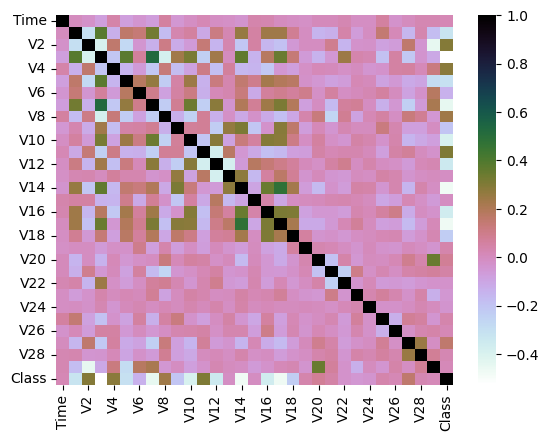

In [11]:
sns.heatmap(df.corr() ,cmap='cubehelix_r')

In [119]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
plt.figure()


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [120]:


y = df['Class']
X = df.drop('Class', axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

L = LogisticRegression()
K = KNeighborsClassifier()
D = DecisionTreeClassifier()
R = RandomForestClassifier()

Name = ["LogisticRegression","KNearest","DecisionTreeClassifier","RandomForestClassifier"]
df_pred  = pd.DataFrame(columns=[Name])

L.fit(X_train, y_train) 
y_L = L.predict(X_test)  
df_pred['LogisticRegression'] = y_L

K.fit(X_train, y_train) 
y_K = L.predict(X_test)  
df_pred['KNearest'] = y_K

D.fit(X_train, y_train) 
y_D = L.predict(X_test)  
df_pred['DecisionTreeClassifier'] = y_D

#R.fit(X_train, y_train) 
#y_R = L.predict(X_test)  
#df_pred['RandomForestClassifier'] = y_R

df_pred.head(3)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,LogisticRegression,KNearest,DecisionTreeClassifier,RandomForestClassifier
0,0.0,0.0,0.0,NaN
1,0.0,0.0,0.0,NaN
2,0.0,0.0,0.0,NaN


In [94]:
X_test['LogisticRegression'] = y_L
X_test['KNearest'] = y_K
X_test['DecisionTreeClassifier'] = y_D
#X_test['RandomForestClassifier'] = y_R

X_test

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V23,V24,V25,V26,V27,V28,Amount,LogisticRegression,KNearest,DecisionTreeClassifier
12491,21877,-3.669908,3.534152,0.385497,-0.212903,-0.611250,0.610623,-2.047971,-6.496272,2.021090,...,0.953540,0.220065,0.036266,0.086031,1.036546,0.593128,1.98,0.0,0.0,0.0
7988,10986,1.138160,-0.327810,0.600767,0.196632,-0.435664,0.508409,-0.682681,0.321610,2.085243,...,0.026198,-0.286112,0.179725,1.121264,-0.076168,-0.027931,3.30,0.0,0.0,0.0
13940,24731,1.322084,0.056017,0.060706,-0.101515,0.020341,-0.224243,-0.200267,-0.088453,1.680598,...,0.060879,-0.810168,0.156965,0.893658,-0.104142,-0.016450,1.00,0.0,0.0,0.0
2616,2148,1.260105,-0.199927,0.044620,-0.918709,-0.758791,-1.322861,-0.057077,-0.088954,1.071055,...,-0.105773,0.503551,0.677963,-0.624395,0.023400,0.005342,1.00,0.0,0.0,0.0
3194,2778,-0.758008,1.194036,1.468459,-0.228320,0.173625,0.093274,0.334217,-0.617912,-0.724588,...,0.098373,0.009096,-0.247266,0.087322,0.325079,0.113879,10.48,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8909,12224,-1.244714,1.113352,2.106622,-0.167221,0.217568,0.961031,0.126125,-0.166206,1.860001,...,-0.348411,-0.841534,-0.027088,0.218777,-0.692713,-0.027362,11.50,0.0,0.0,0.0
11535,19905,1.361909,-0.568104,0.594081,-0.289623,-0.960650,-0.334856,-0.820632,-0.031592,1.044392,...,0.029312,0.015202,0.417461,-0.248529,-0.004367,-0.000265,5.00,0.0,0.0,0.0
16773,28135,1.573769,-1.304318,-0.762677,-2.502948,0.699781,3.452193,-1.843317,0.857773,-1.735859,...,-0.027795,0.996714,0.505775,-0.087193,0.056560,0.018875,2.10,0.0,0.0,0.0
13023,22877,1.284475,-0.528597,-0.551952,-1.692217,1.390419,3.487251,-1.223489,0.875786,2.954982,...,-0.070785,0.957666,0.636471,-0.711079,0.068018,0.024173,11.85,0.0,0.0,0.0


In [116]:
yy = y_test
XX = X_test

XX_train, XX_test, yy_train, yy_test = train_test_split(XX, yy, test_size=0.3, random_state=42)

In [117]:
XX_test

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
2146,1655,-0.968431,0.991932,2.214030,1.619363,-0.885304,0.555810,-0.329020,0.822437,0.109942,...,0.082693,-0.290018,-0.429030,-0.047220,0.542954,-0.001065,-0.428457,0.302630,0.113202,9.99
3898,3472,-0.515195,0.751154,1.040086,-1.252073,1.030374,0.449088,0.969859,-0.179114,0.463282,...,0.299012,-0.398560,-0.617454,-0.365565,-1.393335,-0.043498,0.332865,0.070507,-0.234201,4.00
5817,6283,-0.505607,1.482415,1.348780,2.082020,0.760782,-0.606946,1.377828,-0.358091,-0.546085,...,0.036382,-0.014188,0.096210,-0.124050,0.334388,0.090164,-0.046684,0.036660,0.125401,53.73
14315,25392,-0.476107,1.018658,1.675948,-0.100882,-0.085208,-0.679218,0.638486,0.046081,-0.725425,...,0.131201,-0.156904,-0.414891,-0.007045,0.526087,-0.237845,0.039798,0.263164,0.113917,5.37
12514,21904,-0.734313,0.344140,2.557063,-1.944034,0.049065,0.315641,0.247451,0.046360,2.277521,...,-0.050543,-0.094891,0.284405,-0.392791,-0.347277,0.416478,-0.810731,-0.070069,-0.167933,11.85
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9858,14527,1.148195,-0.055479,0.963189,0.204070,-0.647669,-0.152511,-0.581956,0.042639,1.389081,...,-0.080852,0.031045,0.372703,0.021964,0.253727,0.092640,1.029445,-0.073228,-0.004897,14.95
14364,25478,1.114127,0.243275,0.594401,1.400418,-0.618157,-1.160988,0.209746,-0.253466,-0.079384,...,-0.061415,0.132956,0.341488,-0.082757,0.940947,0.592629,-0.319126,0.011901,0.035300,47.00
461,339,1.202783,-1.464842,0.703284,-1.462520,-1.462982,0.495419,-1.368709,0.236519,-1.938471,...,-0.170801,0.104264,0.575825,-0.033504,-0.278811,0.145526,-0.071895,0.067936,0.026132,98.00
9618,14437,1.242271,-0.177529,0.360619,-0.108596,-0.075899,0.614240,-0.687806,0.196390,1.654188,...,-0.106302,-0.071705,0.025669,-0.134315,-1.137918,0.237475,1.117602,-0.082709,-0.020941,15.95


In [118]:
R.fit(XX_train, yy_train) 
y_R = R.predict(XX_test)  

accuracy = accuracy_score(yy_test, y_R)
accuracy

0.9975201487910725